In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from myprml.rv import (
Bernoulli,
Beta,
Categorical,
Dirichlet,
Gamma,
Uniform,
Gaussian,
StudentsT,
MultivariateGaussian,
MultivariateGaussianMixture
)
np.random.seed(1234) 

In [23]:
model =Bernoulli()
model.fit(np.array([0., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=0.75
)


True
True
True
True


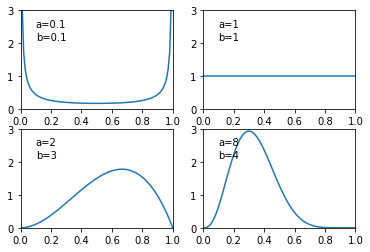

In [6]:
x=np.linspace(0,1,100)
for i,[a,b] in enumerate([[0.1,0.1],[1,1],[2,3],[8,4]]):
    plt.subplot(2,2,i+1)
    beta=Beta(a,b)
    plt.xlim(0,1)
    plt.ylim(0,3)
    plt.plot(x,beta.pdf(x))
    plt.annotate("a={}".format(a),(0.1,2.5))
    plt.annotate("b={}".format(b),(0.1,2.1))
plt.show()

True
True


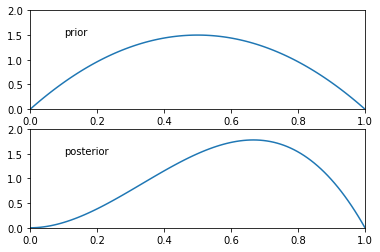

In [9]:
beta=Beta(2,2)
plt.subplot(2,1,1)
plt.xlim(0,1)
plt.ylim(0,2)
plt.plot(x,beta.pdf(x))
plt.annotate("prior",(0.1,1.5))

model=Bernoulli(mu=beta)
model.fit(np.array([1]))
plt.subplot(2,1,2)
plt.xlim(0,1)
plt.ylim(0,2)
plt.plot(x,model.mu.pdf(x))
plt.annotate("posterior",(0.1,1.5))
plt.show()

In [10]:
print("maximum likelihood estimation")
model=Bernoulli()
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

maximum likelihood estimation
10000 out of 10000 is 1


In [11]:
print("Bayesian eatimation")
model=Bernoulli(mu=Beta(1,1))
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

Bayesian eatimation
6649 out of 10000 is 1


In [15]:
model=Categorical()
model.fit(np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1]]))
print(model)

Categorical(
    mu=[ 0.5   0.25  0.25]
)


In [17]:
mu=Dirichlet(alpha=np.ones(3))
model=Categorical(mu=mu)
print(model)
model.fit(np.array([[1., 0., 0.], [1., 0., 0.], [0., 1., 0.]]))
print(model)

Categorical(
    mu=Dirichlet(
        alpha=[ 1.  1.  1.]
     
)
Categorical(
    mu=Dirichlet(
        alpha=[ 3.  2.  1.]
     
)


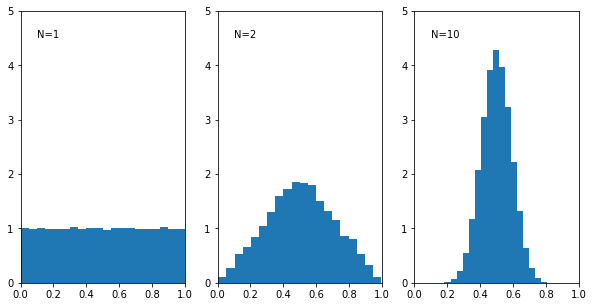

In [21]:
uniform=Uniform(low=0,high=1)
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.xlim(0,1)
plt.ylim(0,5)
plt.annotate("N=1",(0.1,4.5))
plt.hist(uniform.draw(100000),bins=20,normed=True)

plt.subplot(1,3,2)
plt.xlim(0,1)
plt.ylim(0,5)
plt.annotate("N=2",(0.1,4.5))
plt.hist(0.5*(uniform.draw(10000) + uniform.draw(10000)),bins=20,normed=True)

plt.subplot(1,3,3)
plt.xlim(0,1)
plt.ylim(0,5)
sample=0
for _ in range(10):
    sample = sample+uniform.draw(100000)
plt.annotate("N=10",(0.1,4.5))
plt.hist(sample*0.1,bins=20,normed=True)
plt.show()






MultivariateGaussian(
    mu=[ 1.09916809  0.94967318]
)


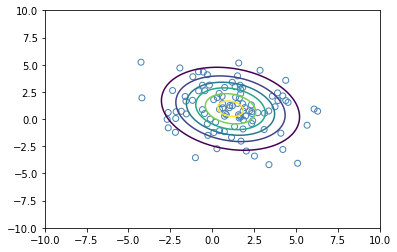

In [5]:
X=np.random.normal(loc=1,scale=2.,size=(100,2))
gaussian = MultivariateGaussian()
gaussian.fit(X)
print(gaussian)

x,y=np.meshgrid(
    np.linspace(-10,10,100),np.linspace(-10,10,100)
)
p=gaussian.pdf(
    np.array([x,y]).reshape(2,-1).T).reshape(100,100)
plt.scatter(X[:,0],X[:,1],facecolor="none",edgecolors="steelblue")
plt.contour(x,y,p)
plt.show()


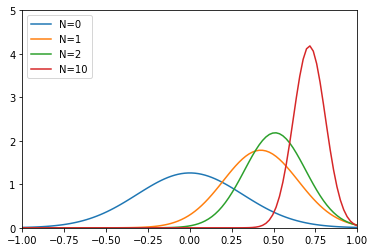

In [2]:
mu=Gaussian(0,0.1)
model=Gaussian(mu,0.1)
x=np.linspace(-1,1,100)
plt.plot(x,model.mu.pdf(x),label="N=0")
model.fit(np.random.normal(loc=0.8,scale=0.1,size=1))
plt.plot(x,model.mu.pdf(x),label="N=1")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=1))
plt.plot(x,model.mu.pdf(x),label="N=2")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=8))
plt.plot(x,model.mu.pdf(x),label="N=10")

plt.xlim(-1,1)
plt.ylim(0,5)
plt.legend()
plt.show()

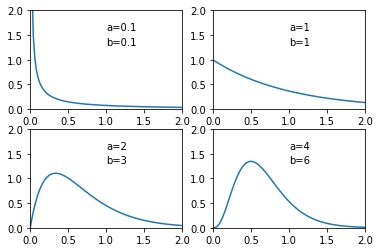

In [3]:
x=np.linspace(0,2,100)
for i,[a,b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [4, 6]]):
    plt.subplot(2,2,i+1)
    gamma=Gamma(a,b)
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.plot(x,gamma.pdf(x))
    plt.annotate("a={}".format(a),(1,1.6))
    plt.annotate("b={}".format(b),(1,1.3))
plt.show()

In [6]:
tau=Gamma(a=1,b=1)
model=Gaussian(mu=0,tau=tau)
print(model)

model.fit(np.random.normal(scale=1.414,size=100))
print(model)

Gaussian(
    mu=0
)
Gaussian(
    mu=0
)


1.05213419641
1.0788842434
1.09371806886
1.10088301393
1.1023374514
1.09960745753
1.09399802101
1.08654005869
1.07800003716
1.06892658212
1.05970197575
1.05058624269
1.04175137341
1.03330671415
1.02531738641
1.0178175049
1.01081961864
1.00432144589
0.998310680744
0.992768426982
0.987671652457
0.982994942163
0.978711746566
0.974795264815
0.9712190625
0.967957495587
0.964985992413
0.96228123159
0.959821243683
0.95758545727
0.955554704778
0.953711199594
0.952038493102
0.950521418153
0.94914602384
0.947899505259
0.946770130949
0.94574717004
0.944820820536
0.943982139783
0.943222977817
0.942535914044
0.941914197543
0.941351691099
0.940842819006
0.940382518583
0.9399661953
0.939589681356
0.939249197564
0.938941318335
0.938662939577
0.938411249324
0.938183700886
0.937977988344
0.937792024214
0.937623919094
0.937471963148
0.937334609263
0.937210457748
0.937098242434
0.93699681806
0.93690514882
0.936822297986
0.936747418495
0.936679744419
0.936618583235
0.936563308826
0.936513355141
0.936468210

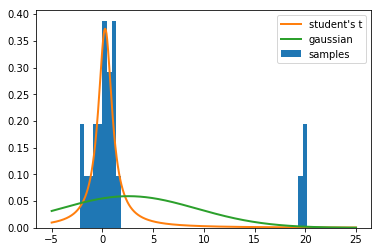

In [2]:
X=np.random.normal(size=20)
X=np.concatenate([X, np.random.normal(loc=20., size=3)])
plt.hist(X.ravel(),bins=50,normed=1.,label="samples")

students_t=StudentsT()
gaussian=Gaussian()
gaussian.fit(X)
students_t.fit(X)

print(gaussian)
print(students_t)

x=np.linspace(-5,25,1000)
plt.plot(x,students_t.pdf(x),label="student's t",linewidth=2)
plt.plot(x, gaussian.pdf(x), label="gaussian", linewidth=2)
plt.legend()
plt.show()

MultivariateGaussianMixture(
    mu=[[ 5.19257195 -5.11521031]
 [-4.82787721 -4.92814811]
 [ 0.00528725  5.05469719]]
)


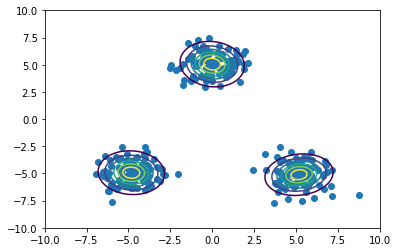

In [5]:
x1=np.random.normal(size=(100,2))
x1 +=np.array([-5,-5])
x2=np.random.normal(size=(100,2))
x2 +=np.array([5,-5])
x3=np.random.normal(size=(100,2))
x3 +=np.array([0,5])
X=np.vstack((x1,x2,x3))
model = MultivariateGaussianMixture(n_components=3)
model.fit(X)
print(model)

x_test,y_test=np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
X_test=np.array([x_test,y_test]).reshape(2,-1).transpose()
probs=model.pdf(X_test)
Probs=probs.reshape(100,100)
plt.scatter(X[:,0],X[:,1])
plt.contour(x_test,y_test,Probs)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [6]:
import  numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

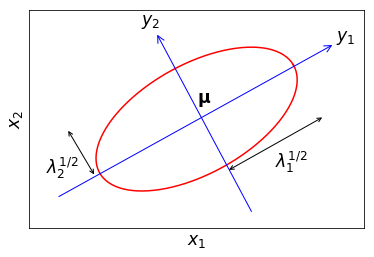

In [11]:
tt=np.linspace(-np.pi,np.pi,100)
xx=np.sin(tt)
yy=2*np.cos(tt)
plt.plot(-xx*np.sin(np.pi/6)-yy*np.cos(np.pi/6),
         xx*np.cos(np.pi/6)-yy*np.sin(np.pi/6),'r')

plt.xlim([-3,3])
plt.ylim([-2,2])
plt.xlabel(r"$x_1$", fontsize="xx-large")
plt.ylabel(r"$x_2$",fontsize="xx-large")

plt.xticks([])
plt.yticks([])

plt.text(0,0.3,r"$\mathbf{\mu}$",fontsize="xx-large")


plt.annotate(r"$y_1$",
           mat fontsize="xx-large",
            xy=(-2.5, -2.5 / np.sqrt(3)), xycoords='data',
            xytext=(2.5, 2.5 / np.sqrt(3)), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3",
                            color="blue"))
plt.annotate(r"$y_2$",
            fontsize="xx-large",
            xy=(1, -np.sqrt(3)), xycoords='data',
            xytext=(-1, np.sqrt(3)), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3",
                            color="blue"))

plt.annotate("",
            xy=(0.55, -0.55 * np.sqrt(3)), xycoords='data',
            xytext=(0.55 + np.sqrt(3), 1-0.55 * np.sqrt(3)), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), 
            )
plt.annotate("",
            xy=(-1.05*np.sqrt(3), -1.05), xycoords='data',
            xytext=(-1.05*np.sqrt(3)-0.5, -1.05+0.5*np.sqrt(3)), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), 
            )

plt.text(-2.7, -1, r"$\lambda_2^{1/2}$", fontsize="xx-large")
plt.text(1.4, -0.9, r"$\lambda_1^{1/2}$", fontsize="xx-large")
plt.show()